<div class="alert alert-block alert-info"><font size="6"><b>Sprint 12 Task 1 (S12_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Take a data set that you want and do a pipeline and a gridsearch using the Random Forest algorithm.</SPAN>

To build a machine learning **pipeline**, the first requirement is to define the structure of the pipeline. In other words, we must list down the exact steps which would go into our machine learning pipeline.

In order to do so, we will build a prototype machine learning model on the existing data before we create a pipeline. The main idea behind building a prototype is to understand the data and necessary preprocessing steps required before the model building process. Based on our learning from the prototype model, we will design a machine learning pipeline that covers all the essential preprocessing steps.


First of all I will import the required libraries in order to start with the task. I will be importing some other libraries as we need them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# import warnings
# warnings.filterwarnings('ignore')


The dataset is from 2020 annual CDC survey data of 400k adults related to their health status.

Retrieved from Kaggle Dataset Personal Key Indicators of Heart Disease uploaded by Kamil Pytlak.

Explore more at: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
heart = pd.read_csv('heart_2020.csv')
pd.set_option('display.max_columns', 30)

In [3]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
heart.shape

(319795, 18)

### Column Details:

1. **HeartDisease:** Responders that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). (Yes / No)  
  
2. **BMI:** Body Mass Index  

3. **Smoking:** Responders that have smoked at least 100 ciagrettes in their lives (Yes / No)

4. **AlcoholDrinking:** Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (Yes / No)

5. **Stroke:** Repsonders that have had a stroke (Yes / No)

6. **PhysicalHealth:** How many days during the last 30 days were the responders' physical health not good? (0-30 days)

7. **MentalHealth:** How many days during the last 30 days was the responders' mental health not good? (0-30 days)

8. **DiffWalking:** Responders have serious difficulty walking or climbing stairs? (Yes / No)

9. **Sex:** Female or Male

10. **AgeCategory:** 13 age groups: '18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'

11. **Race: 7 race groups:** 'White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic'

12. **Diabetic:** Responders' status of diabetes: 'Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)'

13. **PhysicalActivity:** Responders that reported doing physical activity or exercise during the last 30 days other than their regular job. (Yes / No)

14. **GenHealth:** Responders' evaluation their own health by 5 categories: 'Poor','Fair','Good','Very good','Excellent'

15. **SleepTime:** On average, how many hours of sleep do the responders get in a 24-hour period

16. **Asthma:** Responders that have had asthma? (Yes / No)

17. **KidneyDisease:** Responders that have had kiney disease except kidney stones, bladder infection, or incontinence (Yes / No)

18. **SkinCancer:** Responders that have had skin cancer? (Yes / No)

### Descriptive statistical analysis

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). **We are going to use "HeartDisease" as the target variable.**

**Categorical Features**

* *Binary categorical features:* HeartDisease, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease , SkinCancer, PhysicalActivity, DiffWalking

* *Ordinal categorical features:* AgeCategory, GenHealth

* *Nominal categorical features:* Race, Diabetic

**Numerical Features**  

* *Continuous numerical features:* BMI

* *Discrete numerical features:* PhysicalHealth,MentalHealth, SleepTime

**NaN's**

In [7]:
heart.isnull().sum().sum()

0

This dataset it's clean so No NaN's!

**Visualization: Numerical variables**

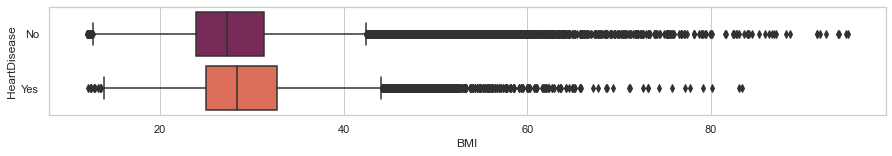

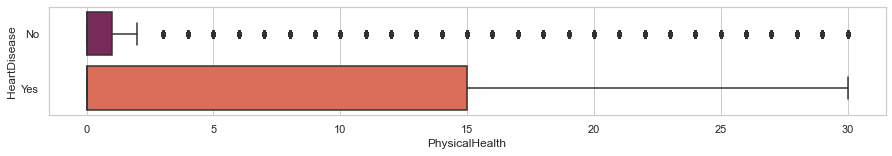

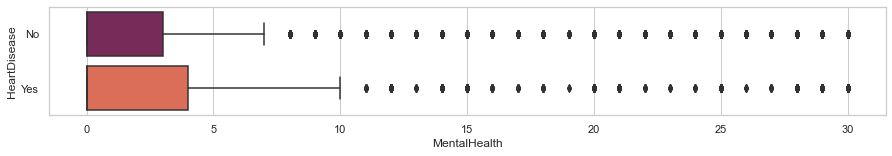

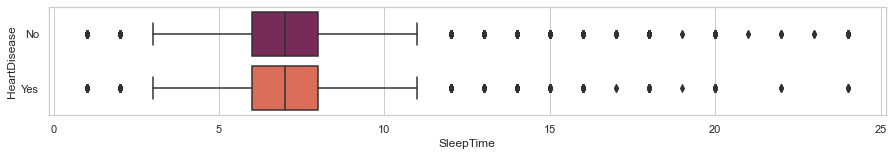

In [8]:
sns.set_theme(style="whitegrid")
num_features = heart.select_dtypes(include = ['float64']).columns

for i in num_features:
    fig, ax = plt.subplots(figsize = (15, 2))
    sns.boxplot(x = heart[i], y = heart.HeartDisease, palette = "rocket")
    plt.show()

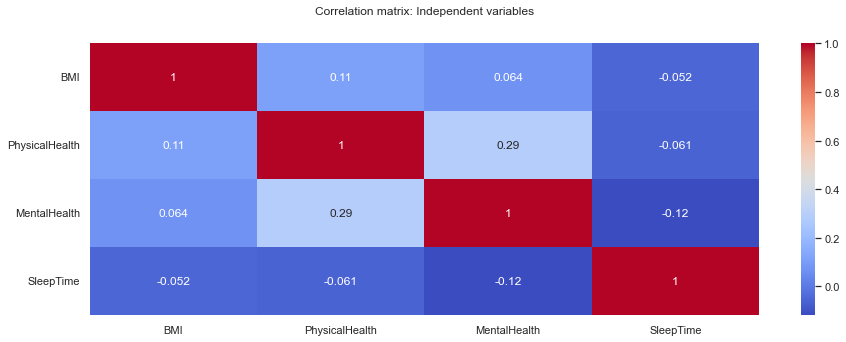

In [9]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation matrix: Independent variables\n\n')
plt.show()

MentalHealth and PhysicalHealth have a soft correlation with each other.

**Visualization: Categorical variables**

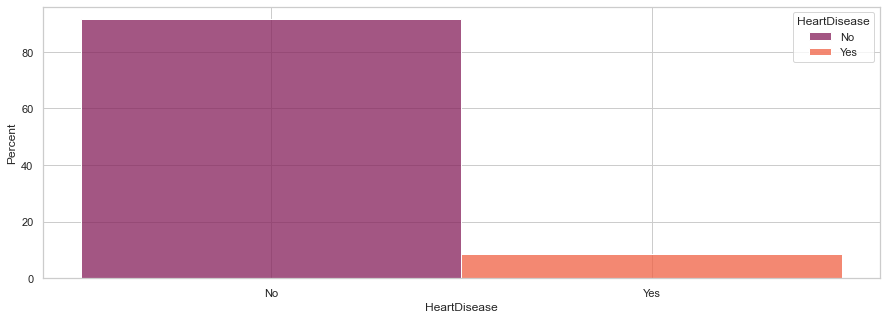

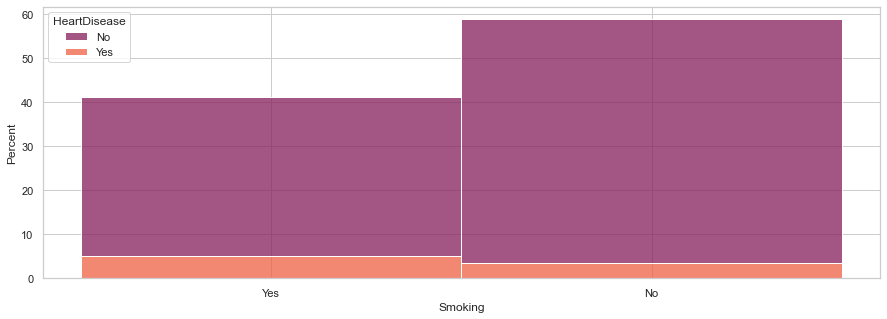

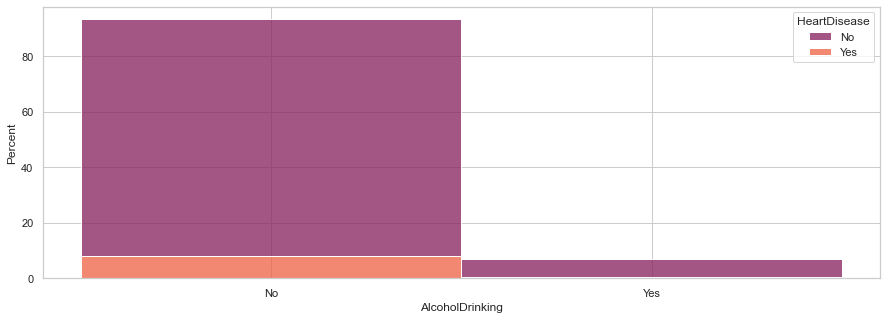

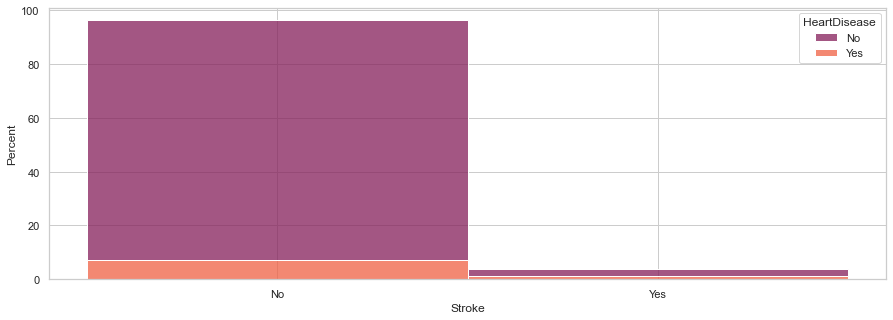

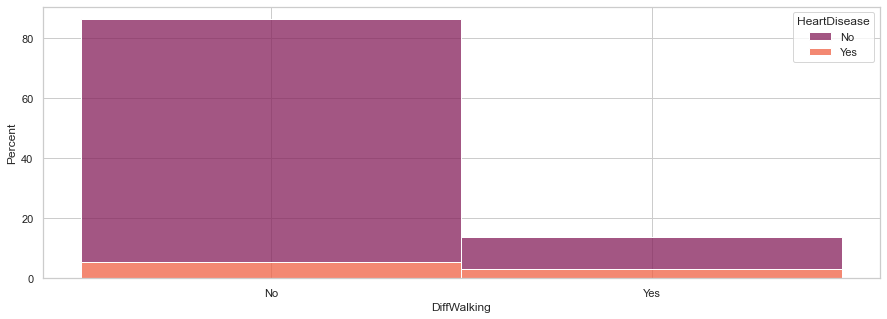

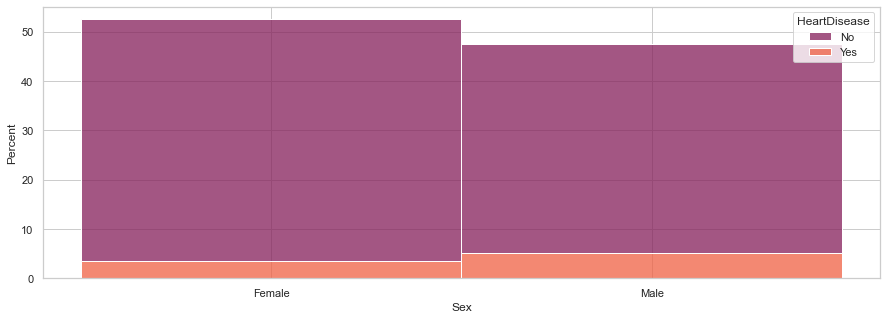

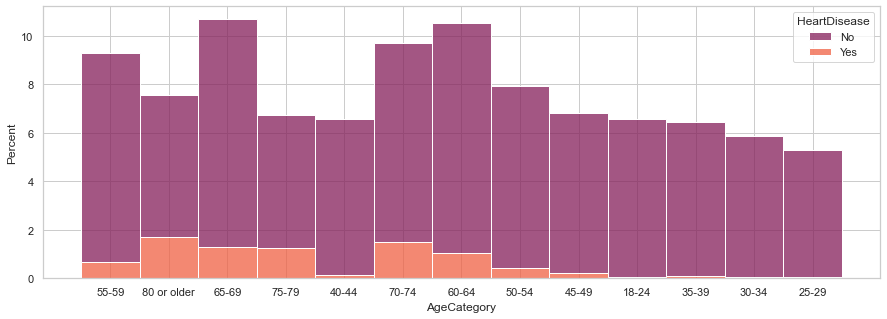

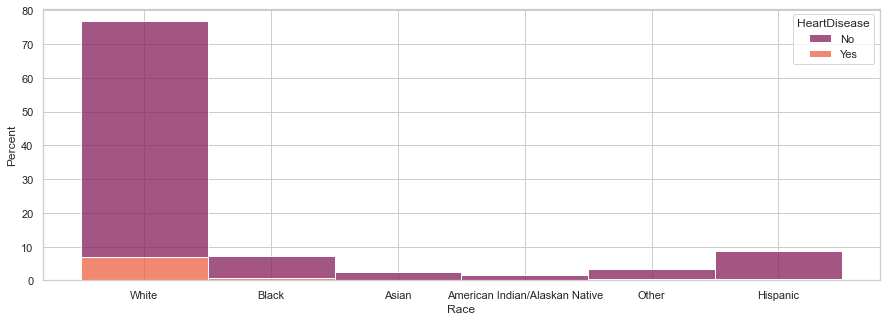

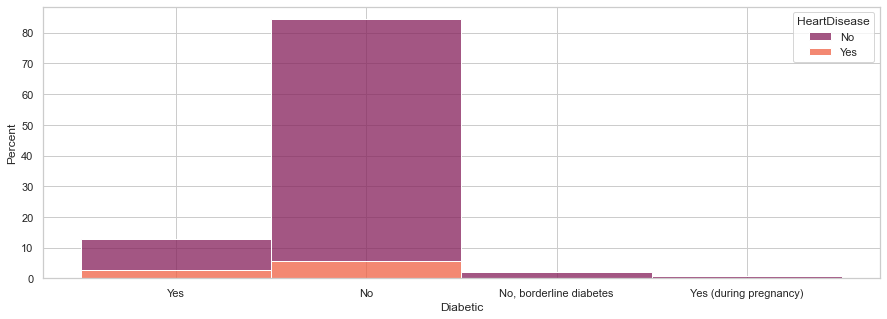

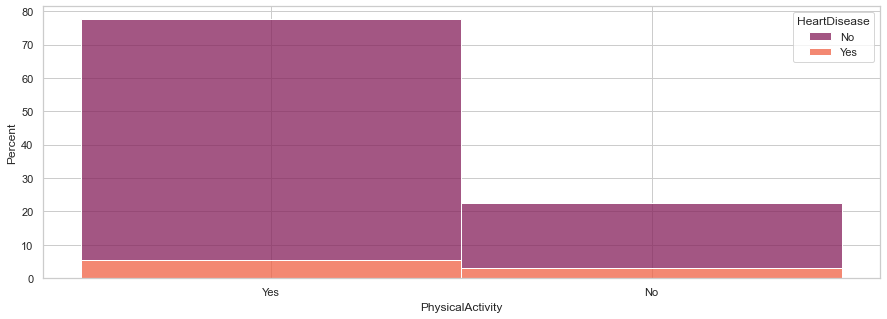

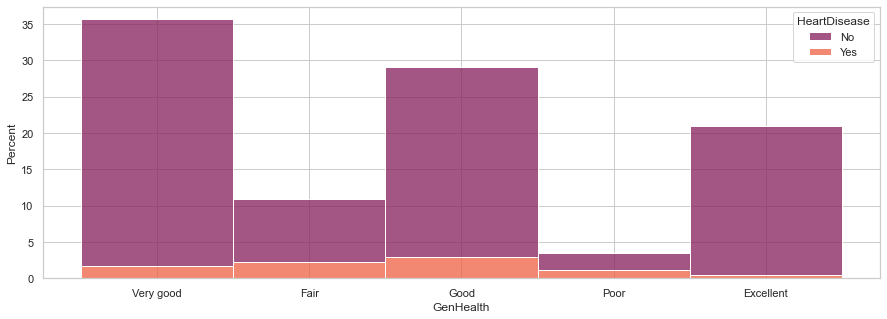

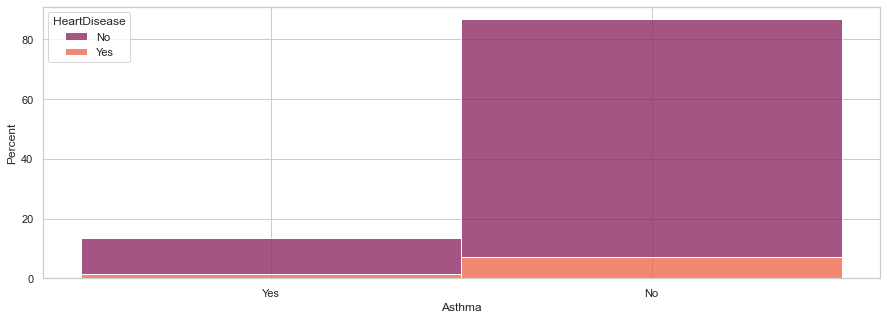

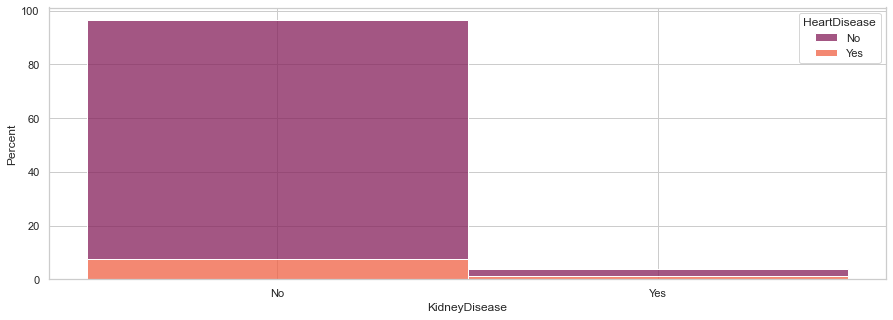

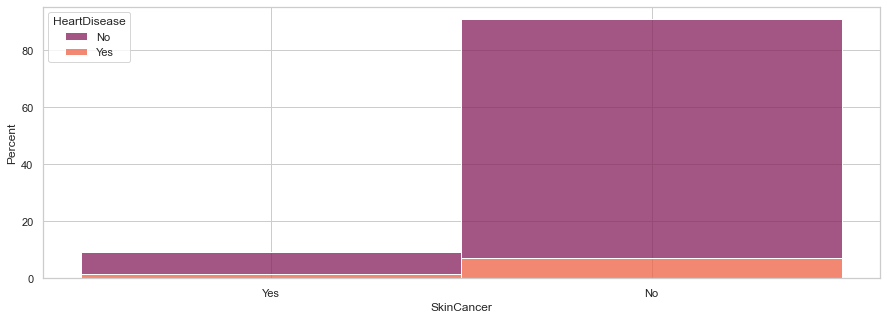

In [10]:
category_features = heart.select_dtypes(include = ['object']).columns.tolist()

for i in category_features:
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.histplot(heart, x = i, hue = 'HeartDisease', stat='percent', multiple = 'stack', palette = "rocket")
    plt.show()

**Observaions from "Descriptive statistical analysis"**

* We have an unbalanced dataset regarding HeartDisease variable
* People with no Diabetes have a higher chance of Heart Disease
* People that smokes or drink has higher chances of Heart Disease
* White people has higher chances of Heart Disease

###  Feature engineering

**Encode categorical variables: Binary, Ordinal, Nominal**

*Binary encoding*

In [11]:
binary_cols = ['HeartDisease', 'Smoking', 'Stroke', 'Asthma', 'AlcoholDrinking', 'KidneyDisease', 
               'Sex', 'SkinCancer', 'PhysicalActivity', 'DiffWalking']

for col in binary_cols:
    heart[col] = heart[col].replace(list(heart[col].unique()),[0,1])

*Ordinal encoding*

In [12]:
ordinal_cols = ['AgeCategory', 'GenHealth']

OE = ce.OrdinalEncoder(cols = ordinal_cols, return_df = True)
heart = OE.fit_transform(heart)

*Nominal encoding*

In [13]:
nominal_cols = ['Race', 'Diabetic']

OHE = ce.OneHotEncoder(cols = nominal_cols, use_cat_names = True)
heart = OHE.fit_transform(heart)

**Scale data**

In [14]:
#scale data
scaler = MinMaxScaler()
heart = pd.DataFrame(scaler.fit_transform(heart), columns = heart.columns)

SMOTE HeartDisease variable

In [15]:
Counter(heart.HeartDisease)

Counter({0.0: 292422, 1.0: 27373})

In [16]:
x = heart.drop(['HeartDisease'], axis = 'columns')
y = heart['HeartDisease']

x, y = SMOTE(sampling_strategy = 'minority').fit_resample(x, y)

In [17]:
Counter(y)

Counter({0.0: 292422, 1.0: 292422})

Now we have a balanced dataset regarding target variable **HeartDisease**.

**Train/Test data split**

In [18]:
# Train/Test split for modelization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(467875, 25) (116969, 25) (467875,) (116969,)


###  Modelization: Random Forest Classifier

In [19]:
# create an object of RandomForestRegressor
model_RFR = RandomForestClassifier()

# fit the model with the training data
model_RFR.fit(x_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', round(mean_squared_error(y_train, predict_train)**(0.5),2))
print('RMSE on test data: ',  round(mean_squared_error(y_test, predict_test)**(0.5),2))

RMSE on train data:  0.04
RMSE on test data:  0.27


In [20]:
print(f'model: {str(model_RFR)}')
print(f'Accuracy_score: {accuracy_score(y_test, predict_test)}')
print(f'Precission_score: {precision_score(y_test, predict_test)}')
print(f'Recall_score: {recall_score(y_test, predict_test)}')
print(f'F1-score: {f1_score(y_test, predict_test)}')

model: RandomForestClassifier()
Accuracy_score: 0.9256213184689961
Precission_score: 0.929156252693269
Recall_score: 0.9215317548508419
F1-score: 0.9253282980001716


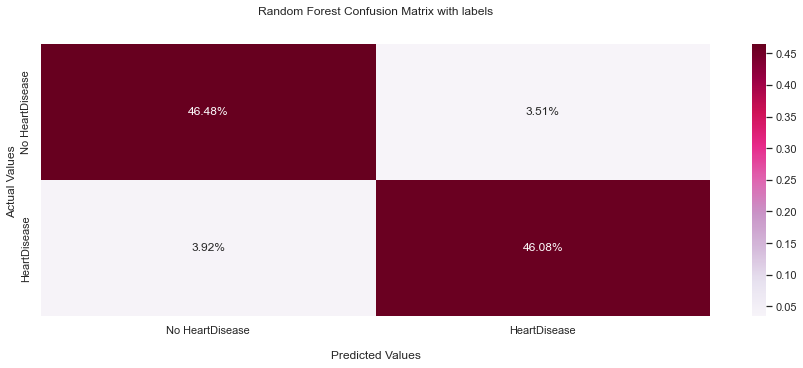

In [21]:
fig, ax = plt.subplots(figsize = (15, 5))
cm  = confusion_matrix(y_test, predict_test)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Random Forest Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

We've got good metrics, model predicts very good if a person has a **HeartDisease**.

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

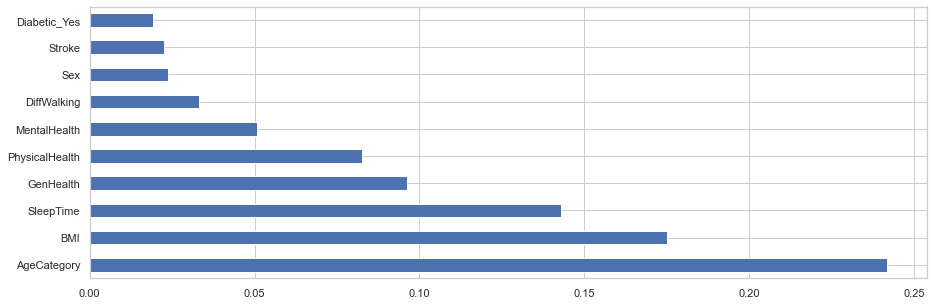

In [22]:
# plot the 10 most important features 

plt.figure(figsize = (15,5))
feat_importances = pd.Series(model_RFR.feature_importances_, index = x_train.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [23]:
selected_cols = feat_importances.nlargest(10).keys() # Rerun model with 10 most important features

In [24]:
x_train2 = x_train[selected_cols]
x_test2 = x_test[selected_cols]

In [25]:
# create an object of RandomForestRegressor
model_RFR2 = RandomForestClassifier()

# fit the model with the training data
model_RFR.fit(x_train2, y_train)

# predict the target on train and test data
predict_train2 = model_RFR.predict(x_train2)
predict_test2 = model_RFR.predict(x_test2)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', round(mean_squared_error(y_train, predict_train2)**(0.5),2))
print('RMSE on test data: ',  round(mean_squared_error(y_test, predict_test2)**(0.5),2))

RMSE on train data:  0.08
RMSE on test data:  0.3


In [26]:
print(f'model: {str(model_RFR)}')
print(f'Accuracy_score: {accuracy_score(y_test, predict_test2)}')
print(f'Precission_score: {precision_score(y_test, predict_test2)}')
print(f'Recall_score: {recall_score(y_test, predict_test2)}')
print(f'F1-score: {f1_score(y_test, predict_test2)}')

model: RandomForestClassifier()
Accuracy_score: 0.9086082637279963
Precission_score: 0.9220744821740743
Recall_score: 0.8926916830498334
F1-score: 0.9071452148081234


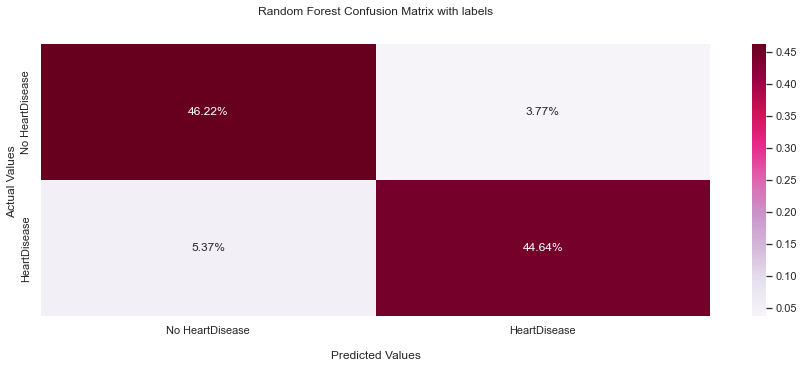

In [27]:
fig, ax = plt.subplots(figsize = (15, 5))
cm  = confusion_matrix(y_test, predict_test2)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

Prediction it is not as good without all variables.

### Pipeline design

In [28]:
heart = pd.read_csv('heart_2020.csv')
heart = heart.sample(10000)

In [29]:
# Binary custom transformer "in one colum"

binary_cols = ['Smoking', 'Stroke', 'Asthma', 'AlcoholDrinking', 'KidneyDisease', 
               'Sex', 'SkinCancer', 'PhysicalActivity', 'DiffWalking'] 

def binarycol(x):
    
    for col in binary_cols:
            x[col] = x[col].replace(list(x[col].unique()),[0,1])
    return (x)

binarycol_transformer = preprocessing.FunctionTransformer(binarycol)

Using FunctionTransformer, it is easy to make the functions used in the feature engineering and column selection process compatible with the pipeline.

In [30]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(remainder = 'passthrough',
    transformers = [
        ('binary', binarycol_transformer, binary_cols),
        ('ordinal', OE, ordinal_cols),
        ('nominal', OHE, nominal_cols),
        ('scale', scaler, num_features)
         ])

To use the ColumnTransformer, you must specify a list of transformers. Each transformer is a three-element tuple that defines the name of the transformer, the transform to apply, and the column indices to apply it to.

Now we build the pipeline with de pre-processing operations and the Random Foress Classifier fit method:

In [31]:
model_pipeline = Pipeline(
    steps = [
        ('pre_processing', preprocessor),
        ('classifier', RandomForestClassifier())
        ])

In [32]:
x = heart.drop(['HeartDisease'], axis = 'columns')
y = pd.DataFrame(heart['HeartDisease'].replace(list(x[col].unique()),[0,1]))

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 17) (2000, 17) (8000, 1) (2000, 1)


We fit the pipeline with the training data:

In [34]:
model_pipeline.fit(x_train, np.ravel(y_train))

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary',
                                                  FunctionTransformer(func=<function binarycol at 0x0000028F64D14B80>),
                                                  ['Smoking', 'Stroke',
                                                   'Asthma', 'AlcoholDrinking',
                                                   'KidneyDisease', 'Sex',
                                                   'SkinCancer',
                                                   'PhysicalActivity',
                                                   'DiffWalking']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['AgeCategory',
                                                                       'GenHealth'],
                                                              

In [35]:
# R Square
rsqr_train = model_pipeline.score(x_train, y_train)
rsqr_test = model_pipeline.score(x_test, y_test)

print ('R2_train = ', rsqr_train)
print ('R2_test = ', rsqr_test)

R2_train =  0.999875
R2_test =  0.9095


We've got good prediction results as we expected from previous work.

Let's see all parameters we have available for pipeline:

In [36]:
sorted(model_pipeline.get_params().keys())

['classifier',
 'classifier__bootstrap',
 'classifier__ccp_alpha',
 'classifier__class_weight',
 'classifier__criterion',
 'classifier__max_depth',
 'classifier__max_features',
 'classifier__max_leaf_nodes',
 'classifier__max_samples',
 'classifier__min_impurity_decrease',
 'classifier__min_samples_leaf',
 'classifier__min_samples_split',
 'classifier__min_weight_fraction_leaf',
 'classifier__n_estimators',
 'classifier__n_jobs',
 'classifier__oob_score',
 'classifier__random_state',
 'classifier__verbose',
 'classifier__warm_start',
 'memory',
 'pre_processing',
 'pre_processing__binary',
 'pre_processing__binary__accept_sparse',
 'pre_processing__binary__check_inverse',
 'pre_processing__binary__func',
 'pre_processing__binary__inv_kw_args',
 'pre_processing__binary__inverse_func',
 'pre_processing__binary__kw_args',
 'pre_processing__binary__validate',
 'pre_processing__n_jobs',
 'pre_processing__nominal',
 'pre_processing__nominal__cols',
 'pre_processing__nominal__drop_invariant',

**Grid Search**

Grid search uses a grid of predefined hyperparameters to test all possible permutations and return the model variant that leads to the best results.

In [37]:
# Parameters combination (Random Forest)
parameters = {"classifier__n_estimators": [50, 100, 200], "classifier__min_samples_leaf": [1, 10, 20], 'classifier__max_depth': [None, 10, 20]}

# create and instantiate grid search
grid = GridSearchCV(model_pipeline, parameters, cv=5) #  5 splits

#fit the model
grid.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         FunctionTransformer(func=<function binarycol at 0x0000028F64D14B80>),
                                                                         ['Smoking',
                                                                          'Stroke',
                                                                          'Asthma',
                                                                          'AlcoholDrinking',
                                                                          'KidneyDisease',
                                                                          'Sex',
                                                                          'SkinCancer',
        

In [38]:
print(f'Best CV score = {grid.best_score_}')
print(f'Best parameters combination: {grid.best_params_}')

Best CV score = 0.9105000000000001
Best parameters combination: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 200}


In [39]:
scores = cross_val_score(grid, x_train, np.ravel(y_train), cv=5)
print(f'CV scores = {scores}')
print(f'{scores.mean()} accuracy with a standard deviation of {scores.std()}')

CV scores = [0.910625 0.91     0.91     0.910625 0.91    ]
0.9102500000000001 accuracy with a standard deviation of 0.0003061862178478907


There we have it, we implemented a pipeline that would be usefull if we have same new data with same estructure.

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Take an english text that you like and calculate words frequency.</SPAN>

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# nltk.download('punkt')
# nltk.download('stopwords')
import string
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
# nltk.download('vader_lexicon')

We are going to use the following article related to Imegen by John Lennon:

In [41]:
lennon = """“Imagine” by John Lennon was a protest song that questioned the morality of war, displayed anti-war statements, 
and emphasized the importance of world peace. Lennon’s use of pathos is one of the most prominent elements of the song. 
His lyrics provide emotional lyrics for his thoughts and act as a bridge between him and his listeners. The repetition of 
the word “imagine,” for example, gave a feeling of peace to those listening to the song. This song also has a powerful 
political message that is hidden by a lovely melody. The tone of the song is an important aspect of “Imagine”. 
“Imagine all the people living for today”, which means that Lennon is telling everyone in the world to be happy for today 
and not put it off for another day. As he speaks about a world without religion, nation, or greed, it is also intended that 
the target market for this song will be the entire world. All of these issues exist all over the world, and the song’s 
main message is world peace, which involves the entire world."""

Tokenize text:

In [42]:
tokenized_lennon = word_tokenize(lennon)
print(tokenized_lennon)

['“', 'Imagine', '”', 'by', 'John', 'Lennon', 'was', 'a', 'protest', 'song', 'that', 'questioned', 'the', 'morality', 'of', 'war', ',', 'displayed', 'anti-war', 'statements', ',', 'and', 'emphasized', 'the', 'importance', 'of', 'world', 'peace', '.', 'Lennon', '’', 's', 'use', 'of', 'pathos', 'is', 'one', 'of', 'the', 'most', 'prominent', 'elements', 'of', 'the', 'song', '.', 'His', 'lyrics', 'provide', 'emotional', 'lyrics', 'for', 'his', 'thoughts', 'and', 'act', 'as', 'a', 'bridge', 'between', 'him', 'and', 'his', 'listeners', '.', 'The', 'repetition', 'of', 'the', 'word', '“', 'imagine', ',', '”', 'for', 'example', ',', 'gave', 'a', 'feeling', 'of', 'peace', 'to', 'those', 'listening', 'to', 'the', 'song', '.', 'This', 'song', 'also', 'has', 'a', 'powerful', 'political', 'message', 'that', 'is', 'hidden', 'by', 'a', 'lovely', 'melody', '.', 'The', 'tone', 'of', 'the', 'song', 'is', 'an', 'important', 'aspect', 'of', '“', 'Imagine', '”', '.', '“', 'Imagine', 'all', 'the', 'people', 

Removing the unnecessary puntuation:

In [43]:
tokenized_lennon = list(filter(lambda x: x not in string.punctuation, tokenized_lennon)) # Remove (','; '.')
print(tokenized_lennon)

['“', 'Imagine', '”', 'by', 'John', 'Lennon', 'was', 'a', 'protest', 'song', 'that', 'questioned', 'the', 'morality', 'of', 'war', 'displayed', 'anti-war', 'statements', 'and', 'emphasized', 'the', 'importance', 'of', 'world', 'peace', 'Lennon', '’', 's', 'use', 'of', 'pathos', 'is', 'one', 'of', 'the', 'most', 'prominent', 'elements', 'of', 'the', 'song', 'His', 'lyrics', 'provide', 'emotional', 'lyrics', 'for', 'his', 'thoughts', 'and', 'act', 'as', 'a', 'bridge', 'between', 'him', 'and', 'his', 'listeners', 'The', 'repetition', 'of', 'the', 'word', '“', 'imagine', '”', 'for', 'example', 'gave', 'a', 'feeling', 'of', 'peace', 'to', 'those', 'listening', 'to', 'the', 'song', 'This', 'song', 'also', 'has', 'a', 'powerful', 'political', 'message', 'that', 'is', 'hidden', 'by', 'a', 'lovely', 'melody', 'The', 'tone', 'of', 'the', 'song', 'is', 'an', 'important', 'aspect', 'of', '“', 'Imagine', '”', '“', 'Imagine', 'all', 'the', 'people', 'living', 'for', 'today', '”', 'which', 'means', '

Words frequency and distribution plot:

In [44]:
fdist = FreqDist(tokenized_lennon)
print(fdist)
print ('The 5 most frequent words are:\n', fdist.most_common(5))

<FreqDist with 108 samples and 192 outcomes>
The 5 most frequent words are:
 [('the', 14), ('of', 10), ('song', 7), ('world', 7), ('a', 6)]


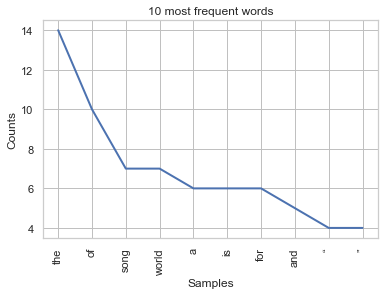

In [45]:
fdist.plot(10, cumulative = False, title = ('10 most frequent words'))
plt.show()

In next practice we are going to improve this code to remove stopwords like the, of, a, is, etc.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Remove stopwords and perform dataset stemming.</SPAN>

We are going to filter the following stopwords:

In [46]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'hadn', 'their', 'during', 'only', 'in', 'from', 'himself', 'most', 'been', "weren't", 'few', 'd', 'just', 'who', 'do', 'have', 'mightn', 'him', 'of', 'its', 'too', 'isn', 'this', 'ourselves', 'is', "doesn't", 'me', 'ain', 'haven', 'his', 've', 't', "it's", 'o', "isn't", 'doing', 'theirs', 'where', 'while', "haven't", "you're", 'be', 'when', "shan't", 'not', 'both', 'did', 'needn', "won't", 'are', 'my', 're', "you'll", 'why', 'an', 'those', 'off', 'once', 'what', 'your', 'against', "you've", 's', 'and', 'between', 'aren', 'weren', 'herself', 'because', 'there', 'same', 'whom', 'so', 'ours', 'again', "that'll", 'over', 'after', 'the', 'doesn', 'i', "didn't", 'does', 'own', 'it', 'y', 'am', 'nor', 'ma', 'on', 'very', 'but', 'through', 'they', "should've", 'shouldn', 'being', 'her', "mustn't", 'that', 'if', 'now', 'don', 'yourself', 'them', 'below', 'with', 'above', 'yours', 'for', 'should', 'a', 'wouldn', 'other', 'll', 'any', 'all', 'he', 'was', 'themselves', 'can', "aren't", "hasn't",

In [47]:
filtered_words = []
for w in tokenized_lennon:
    if w not in stop_words and w not in ['“', '”', '’']:
        filtered_words.append(w)

print(f'Filtered words: {filtered_words}')

Filtered words: ['Imagine', 'John', 'Lennon', 'protest', 'song', 'questioned', 'morality', 'war', 'displayed', 'anti-war', 'statements', 'emphasized', 'importance', 'world', 'peace', 'Lennon', 'use', 'pathos', 'one', 'prominent', 'elements', 'song', 'His', 'lyrics', 'provide', 'emotional', 'lyrics', 'thoughts', 'act', 'bridge', 'listeners', 'The', 'repetition', 'word', 'imagine', 'example', 'gave', 'feeling', 'peace', 'listening', 'song', 'This', 'song', 'also', 'powerful', 'political', 'message', 'hidden', 'lovely', 'melody', 'The', 'tone', 'song', 'important', 'aspect', 'Imagine', 'Imagine', 'people', 'living', 'today', 'means', 'Lennon', 'telling', 'everyone', 'world', 'happy', 'today', 'put', 'another', 'day', 'As', 'speaks', 'world', 'without', 'religion', 'nation', 'greed', 'also', 'intended', 'target', 'market', 'song', 'entire', 'world', 'All', 'issues', 'exist', 'world', 'song', 'main', 'message', 'world', 'peace', 'involves', 'entire', 'world']


In [48]:
# Words frequency

fdist = FreqDist(filtered_words)
print(fdist)
print ('The 5 most frequent words are:\n', fdist.most_common(5))

<FreqDist with 72 samples and 96 outcomes>
The 5 most frequent words are:
 [('song', 7), ('world', 7), ('Imagine', 3), ('Lennon', 3), ('peace', 3)]


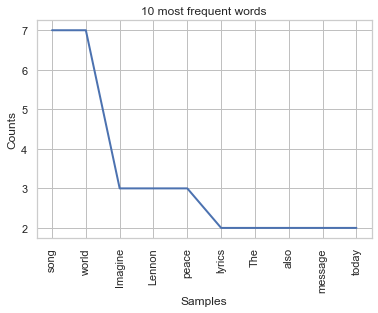

In [49]:
fdist.plot(10, cumulative = False, title = ('10 most frequent words'))
plt.show()

Song and World are by far the most common words in the text, 7 times each.

**Stemming**: is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

Let´s apply the steeming now.

In [50]:
#Stemming

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

print("Filtered Words:",filtered_words[:15])
print("Stemmed Words:",stemmed_words[:15])

Filtered Words: ['Imagine', 'John', 'Lennon', 'protest', 'song', 'questioned', 'morality', 'war', 'displayed', 'anti-war', 'statements', 'emphasized', 'importance', 'world', 'peace']
Stemmed Words: ['imagin', 'john', 'lennon', 'protest', 'song', 'question', 'moral', 'war', 'display', 'anti-war', 'statement', 'emphas', 'import', 'world', 'peac']


Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

Source: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

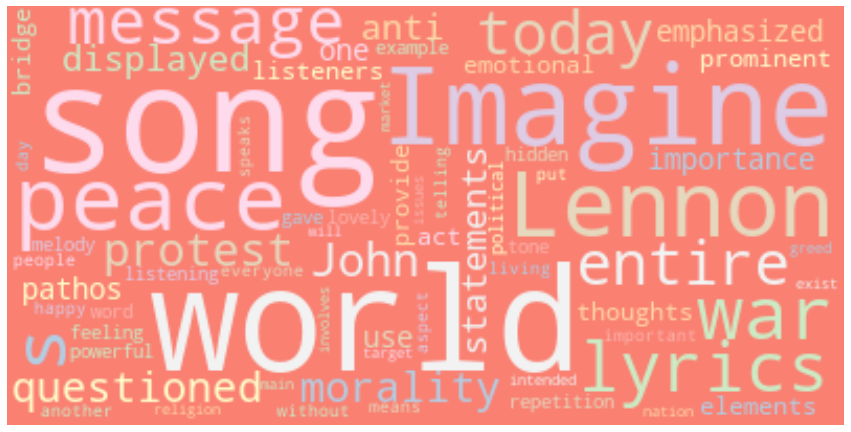

In [51]:
wordcloud = WordCloud(max_font_size = 70, max_words = 70, background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(lennon)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Perform sentiment analysis on your dataset.</SPAN>

**Sentiment analysis** is the practice of using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

In [52]:
tokenized_text = sent_tokenize(lennon)
print(tokenized_text)

['“Imagine” by John Lennon was a protest song that questioned the morality of war, displayed anti-war statements, \nand emphasized the importance of world peace.', 'Lennon’s use of pathos is one of the most prominent elements of the song.', 'His lyrics provide emotional lyrics for his thoughts and act as a bridge between him and his listeners.', 'The repetition of \nthe word “imagine,” for example, gave a feeling of peace to those listening to the song.', 'This song also has a powerful \npolitical message that is hidden by a lovely melody.', 'The tone of the song is an important aspect of “Imagine”.', '“Imagine all the people living for today”, which means that Lennon is telling everyone in the world to be happy for today \nand not put it off for another day.', 'As he speaks about a world without religion, nation, or greed, it is also intended that \nthe target market for this song will be the entire world.', 'All of these issues exist all over the world, and the song’s \nmain message 

In [53]:
df_lennon = pd.DataFrame({'Sentences': tokenized_text})
df_lennon

,Sentences
0,“Imagine” by John Lennon was a protest song th...
1,Lennon’s use of pathos is one of the most prom...
2,His lyrics provide emotional lyrics for his th...
3,"The repetition of \nthe word “imagine,” for ex..."
4,This song also has a powerful \npolitical mess...
5,The tone of the song is an important aspect of...
6,"“Imagine all the people living for today”, whi..."
7,"As he speaks about a world without religion, n..."
8,"All of these issues exist all over the world, ..."


In [54]:
sentiment_analyzer=SentimentIntensityAnalyzer()

sentiments = df_lennon['Sentences'].apply(lambda x: sentiment_analyzer.polarity_scores(x))

df_lennon['compound'] = sentiments.apply(lambda x : x['compound'])
df_lennon['negative'] = sentiments.apply(lambda x : x['neg'])
df_lennon['neutral'] = sentiments.apply(lambda x : x['neu'])
df_lennon['positive'] = sentiments.apply(lambda x : x['pos'])

In [55]:
df_lennon

,Sentences,compound,negative,neutral,positive
0,“Imagine” by John Lennon was a protest song th...,-0.0772,0.233,0.575,0.192
1,Lennon’s use of pathos is one of the most prom...,0.3804,0.000,0.834,0.166
2,His lyrics provide emotional lyrics for his th...,0.1531,0.000,0.909,0.091
3,"The repetition of \nthe word “imagine,” for ex...",0.6124,0.000,0.762,0.238
4,This song also has a powerful \npolitical mess...,0.7650,0.000,0.625,0.375
5,The tone of the song is an important aspect of...,0.2023,0.000,0.847,0.153
6,"“Imagine all the people living for today”, whi...",0.5719,0.000,0.887,0.113
7,"As he speaks about a world without religion, n...",-0.4019,0.097,0.903,0.000
8,"All of these issues exist all over the world, ...",0.5423,0.000,0.857,0.143


In [56]:
sentiment_analyzer.polarity_scores(lennon)

{'neg': 0.05, 'neu': 0.796, 'pos': 0.154, 'compound': 0.9628}

Overall we have a neutral to positive text.

In [57]:
plt.figure(figsize=(20,30), dpi = 400)
names = df_lennon['Sentences'].str[:50]
barWidth = 0.2

# Create negative Bars
plt.barh(y=names, 
        width=df_lennon.negative, 
        height=barWidth, color='#CD3333', label='Negative')
# Create neutral Bars
plt.barh(y=names, 
        width=df_lennon.neutral,
        height=barWidth,  left=df_lennon.negative,  color='#C1CDCD', label='Neutral')
# Create positive Bars
plt.barh(y=names, 
        width=df_lennon.positive, 
        height=barWidth,  left=[i+j for i,j in zip(df_lennon.negative, df_lennon.neutral)], color='#458B74', label='Positive')
 
plt.yticks(names)
plt.ylabel("Paragraphs (first 10 characters)", fontsize=15)
plt.xlabel("Sentiment Intensity", fontsize=15)
plt.legend(fontsize=15) 
plt.title("Sentiment intensity score of paragraphs.\nIn the order of appearance", fontsize=15)
plt.show()

In this graph we see sentiment analysis result for each sentence in the text. As we have a lot of grey and green, this would be a neutral to positive text.